### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

### Getting Data

In [3]:
dataparser = lambda dates: datetime.strptime(dates, '%Y-%m')
df = pd.read_csv('data/AirPassengers.csv', parse_dates=['Month'], index_col='Month', date_parser=dataparser)
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


### Data Visualization

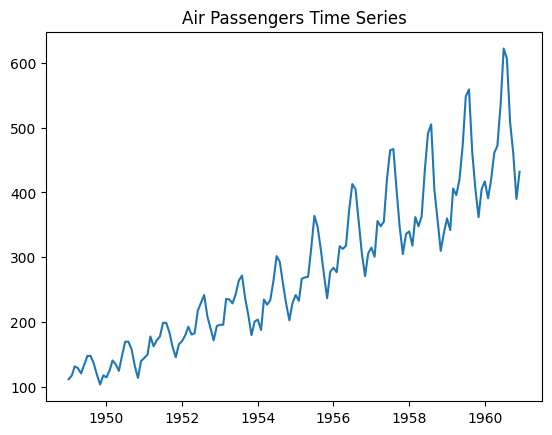

In [24]:
plt.plot(df)
plt.title("Air Passengers Time Series")
plt.show()

In [5]:
decompose = seasonal_decompose(df)

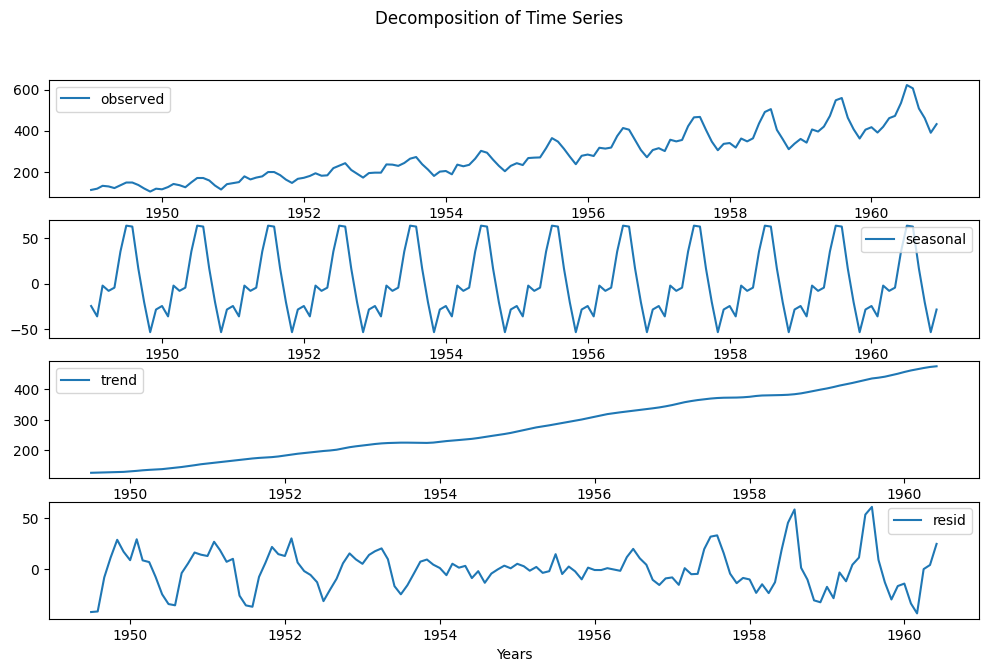

In [29]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(12,7))
axis = [ax1,ax2,ax3,ax4]
ax1.plot(decompose.observed, label='observed')
ax2.plot(decompose.seasonal, label='seasonal')
ax3.plot(decompose.trend, label='trend')
ax4.plot(decompose.resid, label='resid')
for i in axis:
    i.legend(loc='best')

ax4.set_xlabel("Years")
fig.suptitle("Decomposition of Time Series")
plt.show()


### ARIMA model

In [7]:
train = df.loc['1949-01-01':'1959-12-01']
test = df.loc['1960-01-01':]

In [8]:
stepwise_model = auto_arima(train,
                            start_p=1, 
                            start_q=1, 
                            start_d=0, 
                            start_P=0, 
                            max_p=5, 
                            max_q=5, 
                            m=12,
                            seasonal=True, 
                            trace=True,
                            stepwise=True,
                            error_action='ignore')

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=907.364, Time=1.13 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1022.234, Time=0.07 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=906.857, Time=0.79 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=963.555, Time=0.61 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1192.711, Time=0.05 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=907.180, Time=0.19 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=908.543, Time=2.24 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=2.82 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=907.120, Time=2.11 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=7.34 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1021.611, Time=1.27 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=906.396, Time=4.85 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=906.075, Time=0.65 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=906.713, Time=1.37 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   :

In [30]:
model = SARIMAX(train, order=stepwise_model.order, seasonal_order=stepwise_model.seasonal_order)
model_fit = model.fit()
future_forecast = model_fit.forecast(steps=12)
df_pred = pd.DataFrame(future_forecast, index=test.index).rename(columns={"predicted_mean": "#Passengers Forecast"})

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


### Results

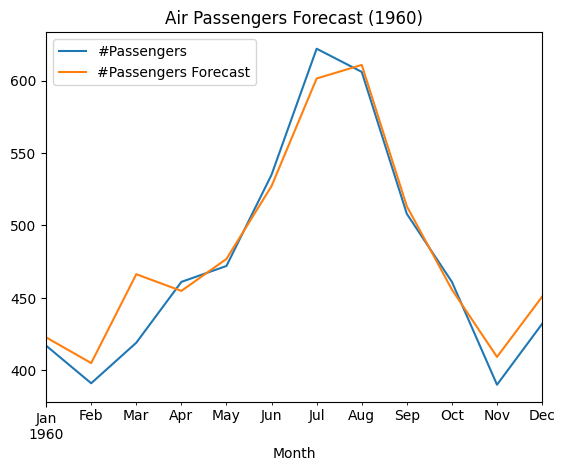

In [33]:
pd.concat([test, df_pred], axis=1).plot()
plt.title("Air Passengers Forecast (1960)")
plt.legend()
plt.show()

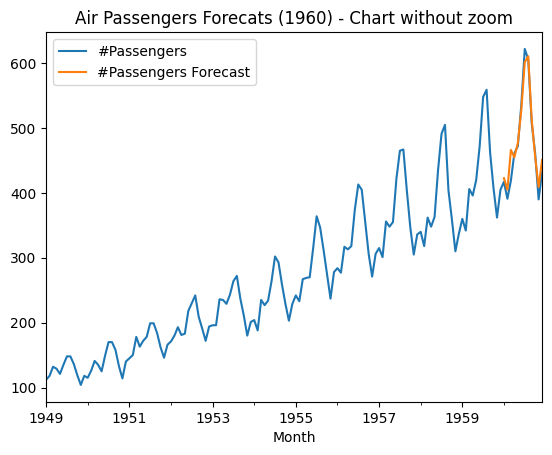

In [35]:
pd.concat([df, df_pred], axis=1).plot()
plt.title("Air Passengers Forecats (1960) - Chart without zoom")
plt.legend()
plt.show()